In [115]:
import pandas as pd
import collections
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.externals import joblib
import seaborn as sns
sns.set(color_codes = True)
import matplotlib.pyplot as plt
%matplotlib inline
from numpy.random import seed
import tensorflow as tf

from keras.callbacks import History 

from keras.layers import Input, Dropout, Dense, LSTM, RepeatVector
from keras.models import Model
from keras import regularizers
data = pd.read_csv("C:/Users/QWERTY/Desktop/MachineLearning/creditcard.csv")
data_train = data[0:87000:3]


In [94]:
X = data_train.drop('Class', axis = 1)
y = data_train.Class
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3333, random_state=0)

In [98]:
X_train = X_train.values.reshape(X_train.shape[0], 1, X_train.shape[1])
print("Training data shape: ", X_train.shape)


Training data shape:  (19334, 1, 30)


In [63]:
X_test = X_test.values.reshape(X_test.shape[0], 1, X_test.shape[1])
print("Training data shape: ", X_test.shape)

Training data shape:  (9666, 1, 30)


In [121]:
def autoencoder_model(X):
    inputs = Input(shape= (X.shape[1], X.shape[2]))
    L1 = LSTM(256, activation='softmax', return_sequences=True, 
             kernel_regularizer = regularizers.l2(0.00))(inputs)
    L2 = LSTM(128, activation='softmax', return_sequences=False)(L1)
    L3 = RepeatVector(X.shape[1])(L2)
    L4 = LSTM(256, activation='softmax',return_sequences=True)(L3)
    L5 = LSTM(256, activation='softmax',return_sequences=True)(L4)
    return model

In [122]:
model = autoencoder_model(X_train)
model.compile(optimizer='adam', loss='mae', metrics=['accuracy'])
model.summary()

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        (None, 1, 30)             0         
_________________________________________________________________
lstm_49 (LSTM)               (None, 1, 256)            293888    
_________________________________________________________________
lstm_50 (LSTM)               (None, 128)               197120    
_________________________________________________________________
repeat_vector_13 (RepeatVect (None, 1, 128)            0         
_________________________________________________________________
lstm_51 (LSTM)               (None, 1, 256)            394240    
_________________________________________________________________
lstm_52 (LSTM)               (None, 1, 256)            525312    
_________________________________________________________________
time_distributed_13 (TimeDis (None, 1, 30)             771

In [124]:
epoch = 10
batch_size = 10
history = model.fit(X_train, X_train, epochs = epoch, validation_split=0.05, batch_size = batch_size).history

Train on 18367 samples, validate on 967 samples
Epoch 1/10
 3170/18367 [====>.........................] - ETA: 3:31 - loss: 1318.4530 - accuracy: 0.9287

KeyboardInterrupt: 

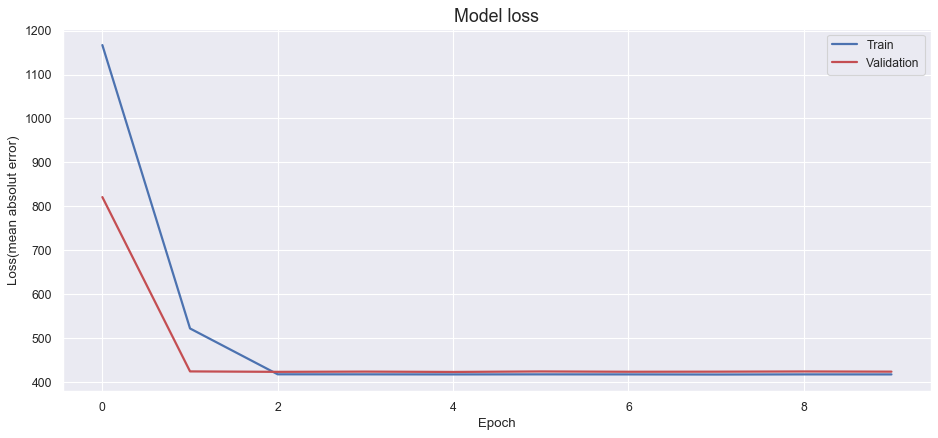

In [76]:
#plot the training losses 
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(history['loss'], 'b', label = 'Train', linewidth = 2)
ax.plot(history['val_loss'], 'r', label='Validation', linewidth = 2)
ax.set_title('Model loss', fontsize = 16)
ax.set_ylabel('Loss(mean absolut error)')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.show()


In [99]:
model.evaluate(X_test, X_train)

ValueError: Error when checking input: expected input_10 to have 3 dimensions, but got array with shape (9666, 30)

ValueError: Found input variables with inconsistent numbers of samples: [9666, 19334]

In [ ]:
scored = pd.DataFrame(index=X_train.index)
Xtrain = X_train.values.reshape(X_train.shape[0], X_train.shape[2])
scored['loss_mae'] = np.mean(np.abs(X_pred-Xtrain), axis=1)
plt.figure(figsize(16, 9), dpi=80)
plt.title('Loss distribution', fontsize=16)
sns.distplot(scored['loss_mae'], bins = 20, kde = True, color='blue');
plt.xlim([0.0, .5])

In [44]:
data_test = data[0:87000:2]

In [45]:
X = data_test.drop('Class', axis = 1)
y = data_test.Class
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

In [ ]:
X_train = X_train.values.reshape(X_train.shape[0], 1, X_train.shape[1])
print("Training data shape: ", X_train.shape)